<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/my_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
#creiamo un set di input features, un set piccolo di osservazioni
#e di variabili, ad esempio 4 oggetti con 3 variabili ciascuna
#ogni variabile è booleana

X=np.array([[0,0,1], 
           [1,1,1], 
           [1,0,1], 
           [0,1,1]])
X

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

(-0.5, 2.5, 3.5, -0.5)

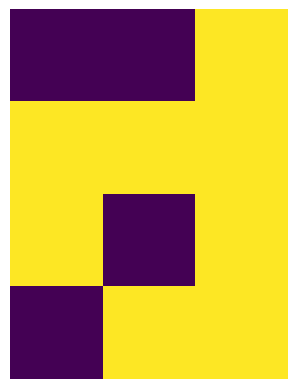

In [3]:
pl.imshow(X);
pl.axis('off')
#feature space binario molto semplice!

In [4]:
#creiamo l'output
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
y.shape

(4, 1)

In [6]:
#l'idea è di predirre l'output sulla base del network
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#1 Layer Neural Network

4 osservazioni
3 neuroni
1 layer

il modello di riferimento è il perceptron, dobbiamo quindi definire i pesi **$w_i$**, il bias **$b$** e la activation function **$f$**

In [7]:
#costruiamo come activation function la sigmoid
def sigmoid(x):
  return 1. / (1. +np.exp(-x))

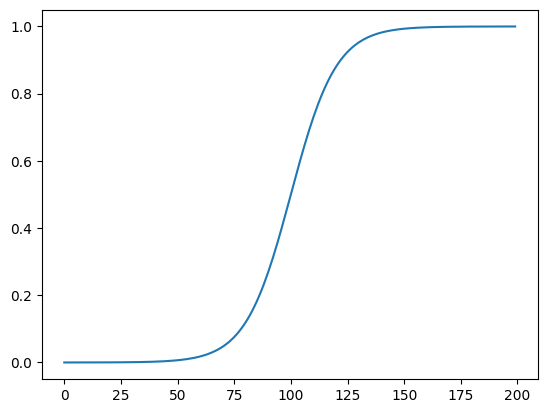

In [8]:
#test per vedere se la sigmoid è fatta bene
pl.plot(sigmoid(np.arange(-10,10, 0.1)))

In [9]:
#costruiamo la loss function
#costruiamo in particolare un vettore distanza tra
#valori reali e valori predetti
def loss(prediction, target):
  return target - prediction

In [10]:
#definiamo la derivata della sigmoid per poter fare la gradient descent
#si fa su wolphram in maniera molto facile
def dsigmoid(x):
  return x * (1. - x) # FBB since you are passing the output = sigmoid(neuron) you just need x here non sigmoud(x)

Iniziamo il neural network vero e proprio! L'architettura si basa sullo stochastic gradient descent, e si deve fissare un criterio di convergenza. E' bene stabilire il numero di iterazioni massime da fare per un neural network.

In [11]:
#Assegno un valore iniziale ai miei weights e al mio bias, e diamo uno
#starting point random
#mettiamo l'hyperparameter del numero max di iterazioni
training = 6000

In [12]:
#layer of synopses /neurons che sia 4 x 3
# 4 x 3 dot 3 x 1
np.random.seed(302)

#con la synapsis iniziale standardizzo i pesi della mia
#synapsis in una funzione tra -1 e 1
syn0 = 2 * np.random.random((3, 1)) - 1
print(syn0.shape)
print(syn0)

loss_output = []

#inizio il mio training
#assumo che il bias b=0

for iter in range(training):
  inputLayer = X
  
  #questa è la forward propagation
  #linear regression
  l1 = np.dot(inputLayer, syn0)
  #activations
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  #funzione con cui costruisco una loss function cumulativa
  loss_output.append(np.abs(output_error).sum())
  #definiamo il gradient descent
  #calculate correction
  #questa operazione si chiama backpropagation
  output_delta = output_error * dsigmoid(output) 
  # += significa correggo
  #apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

(3, 1)
[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

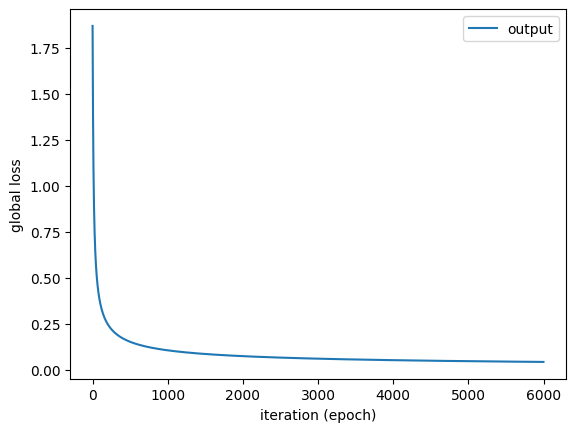

In [13]:
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss")

# 2 Layer Neural Network:

Abbiamo sempre la struttura di prima, ovverosia prendiamo come activation function la sigmoid già definita e come numero massimo di iterazioni 6000. Ripartiamo dall'architettura, vedendo di definire il livello 2

Ho due livelli:

INPUT

LAYER 1 -> 3 NEURONS

LAYER 2 -> 5 NEURONS

OUTPUT

In [16]:
np.random.seed(302)

# 4x3 -> 3x5 ->5x1 => 4x1
syn0 =  2 * np.random.random((3, 5)) - 1 #normalized 0-1
syn1 =  2 * np.random.random((5, 1)) - 1 #normalized 0-1


loss_output = []
loss_hidden = []

for iter in range(training):
  inputLayer = X
  
  # forward propagation

  #linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  #activations
  hidden = sigmoid(l1)

  l2 = np.dot(hidden, syn1)
  #activations
  output = sigmoid(l2)

  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  # backward propagation

  #caluclate correction
  output_delta = output_error * dsigmoid(output)

  # MODIFIED: error on the first layer 
  hidden_error = output_delta.dot(syn1.T)
  loss_hidden.append(np.abs(hidden_error).sum())

  hidden_delta = hidden_error * dsigmoid(hidden)

  #apply correction to weights
  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

output after training
 [[0.00648042]
 [0.99370941]
 [0.99426848]
 [0.00489822]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

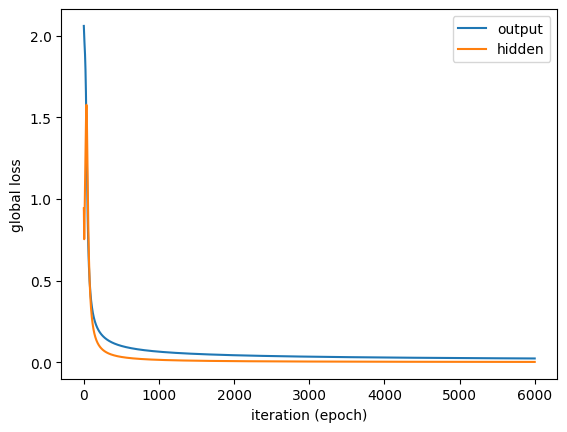

In [17]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss")

# 2 Layer Neural Network con Tensorflow

Usiamo un Python Package classico per fare i neural network.

In [19]:
from tensorflow import keras

#keras è il pacchetto che contiene la struttura per fare modelli
#neurali ed altri modelli di ottimizzazione e visualizzazione
#altro pacchetto molto comune è pytorch (forse quando facciamo i 
#transformers lo scriviamo con lui)

In [21]:
#creo i miei layers con il modello del multi-layer perceptron
#il tipo di layer che usiamo è Dense

#creo l'hidden layer 3 neuroni in input e 5 neuroni in output
hlayer = keras.layers.Dense(5, input_dim=3, activation="sigmoid")
#creo l'output layer 
olayer = keras.layers.Dense(1, activation="linear")

#creo un neural network senza loops
#gli metto dentro i miei layers
model = keras.Sequential([hlayer, olayer])

#visualizzo una tabella che mi da il numero di parametri
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [22]:
#faccio compilare il mio modello
#do le mie scelte architettoniche, ad esempio come loss function uso
#mae = mean absolute error
#scelgo qual'è il gradient descent algorith che uso per fare l'ottimizzazione
#uno dei più comuni è adam
#segnalo al compilatore che metrica utilizzare, ed uso l'accuracy o il mae

#questi sono tutti hyperparameters che eventualmente posso cambiare

model.compile(loss = "mae", optimizer="adam", metrics=["accuracy", "mae"])

In [23]:
#in questo esercizio non ho alcun training set né alcun test set, è solo
#per vedere la sintassi di ciò che usiamo

#fittiamo il modello sui dati
#scelgo quanti steps dare con epochs=1000

model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5878 - accuracy: 0.5000 - mae: 0.5878
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5827 - accuracy: 0.5000 - mae: 0.5827
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5777 - accuracy: 0.5000 - mae: 0.5777
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5726 - accuracy: 0.5000 - mae: 0.5726
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.5675 - accuracy: 0.5000 - mae: 0.5675
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5624 - accuracy: 0.5000 - mae: 0.5624
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5574 - accuracy: 0.5000 - mae: 0.5574
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5523 - accuracy: 0.5000 - mae: 0.5523
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5472 - accuracy: 0.5000 

In [24]:
#notiamo che dopo 1000 epochs ho accuracy al 100%, è un buon monitoraggio

model.predict(X)

1/1 [==============================] - 0s 154ms/step


array([[0.00144272],
       [1.0013999 ],
       [1.0013387 ],
       [0.00144067]], dtype=float32)

In [25]:
y

array([[0],
       [1],
       [1],
       [0]])